In [1]:
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [2]:
import warnings

warnings.filterwarnings("ignore")

# 1. Загрузка данных

https://www.kaggle.com/datasets/naveengowda16/logistic-regression-heart-disease-prediction

In [3]:
df = pd.read_csv('framingham_heart_disease.csv')

In [4]:
df.shape

(4238, 16)

# 2. Описание задачи

<b>Задача</b>. Предсказание риска возникновения сердечно-сосудистого заболевания на горизонте до 10 лет

<b>Признаки - Демографические</b><li>Male (Пол): 1 - male, 0 - female<li>Age (Возраст)<li>Education (Образование): 1 - High School, 2 - High School Diploma / GED, 3 - College, 4 - Degree

<b>Признаки - Поведенческие</b><li>currentSmoker (Курильщик): 1 - The participant is a current smoker, 0 - participant does not smoke currently<li>cigsPerDay (Количество сигарет за день): Number of cigarettes smoked per day

<b>Признаки - Патологические</b><li>BPMeds (Объем принимаемых медикаментов): Amount of BP medication the participant is on<li>prevalentStroke (Факт наличия сердечного приступа в прошлом): 0 - no prevalence of stroke, 1 - has had occurrences of stroke<li>prevalentHyp (Факт преобладания гипертонии, повышенного сердечного давления): 0 - no prevalence of hypertension, 1 - prevalence of hypertension<li>diabetes (Факт наличия диабета): 0 - no diabetes, 1 - has diabetes

<b>Признаки - Медицинские</b><li>totChol (Уровень холестерина): Total cholesterol<li>sysBP (Систолическое кровяное давление): Systolic blood pressure<li>diaBP (Диастолическое кровяное давление): Diastolic blood pressure<li>BMI (Индекс массы тела): Body Mass Index<li>Heart Rate (Частота сердечных сокращений): Heart rate in bpm<li>Glucose (Уровень глюкозы в крови): Glucose level (mg/dL)

In [5]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# 3. Разбейте данные на обучающую и тестовую выборки

In [6]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=49)

# 4. Визуализируйте данные из обучающей выборки

In [7]:
df_train.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,2966.000000,2966.000000,2888.000000,2966.000000,2945.000000,2934.000000,2966.000000,2966.000000,2966.000000,2926.000000,2966.000000,2966.000000,2955.000000,2965.000000,2693.000000,2966.000000
mean,0.436278,49.536076,1.968144,0.503372,9.199321,0.028630,0.005394,0.313554,0.023264,236.658578,132.434761,82.891099,25.792860,75.805396,81.500557,0.151719
std,0.496006,8.555929,1.012405,0.500073,11.947377,0.166792,0.073261,0.464015,0.150765,44.727681,22.064681,11.969999,4.082435,12.039643,23.033209,0.358809
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.350000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.500000,28.065000,83.000000,86.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,696.000000,248.000000,142.500000,51.280000,143.000000,394.000000,1.000000


<AxesSubplot:xlabel='TenYearCHD', ylabel='Count'>

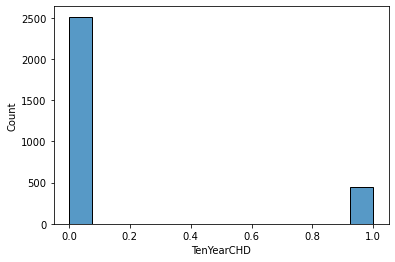

In [8]:
sns.histplot(df_train['TenYearCHD'])

In [9]:
f'Классы несбалансированы - лишь {int(np.round(df_train["TenYearCHD"].mean() * 100, 0))}% наблюдений приходится на репондентов, столкнувшихся с сердено-сосудитыми заболеваниями'

'Классы несбалансированы - лишь 15% наблюдений приходится на репондентов, столкнувшихся с сердено-сосудитыми заболеваниями'

## Количественные признаки

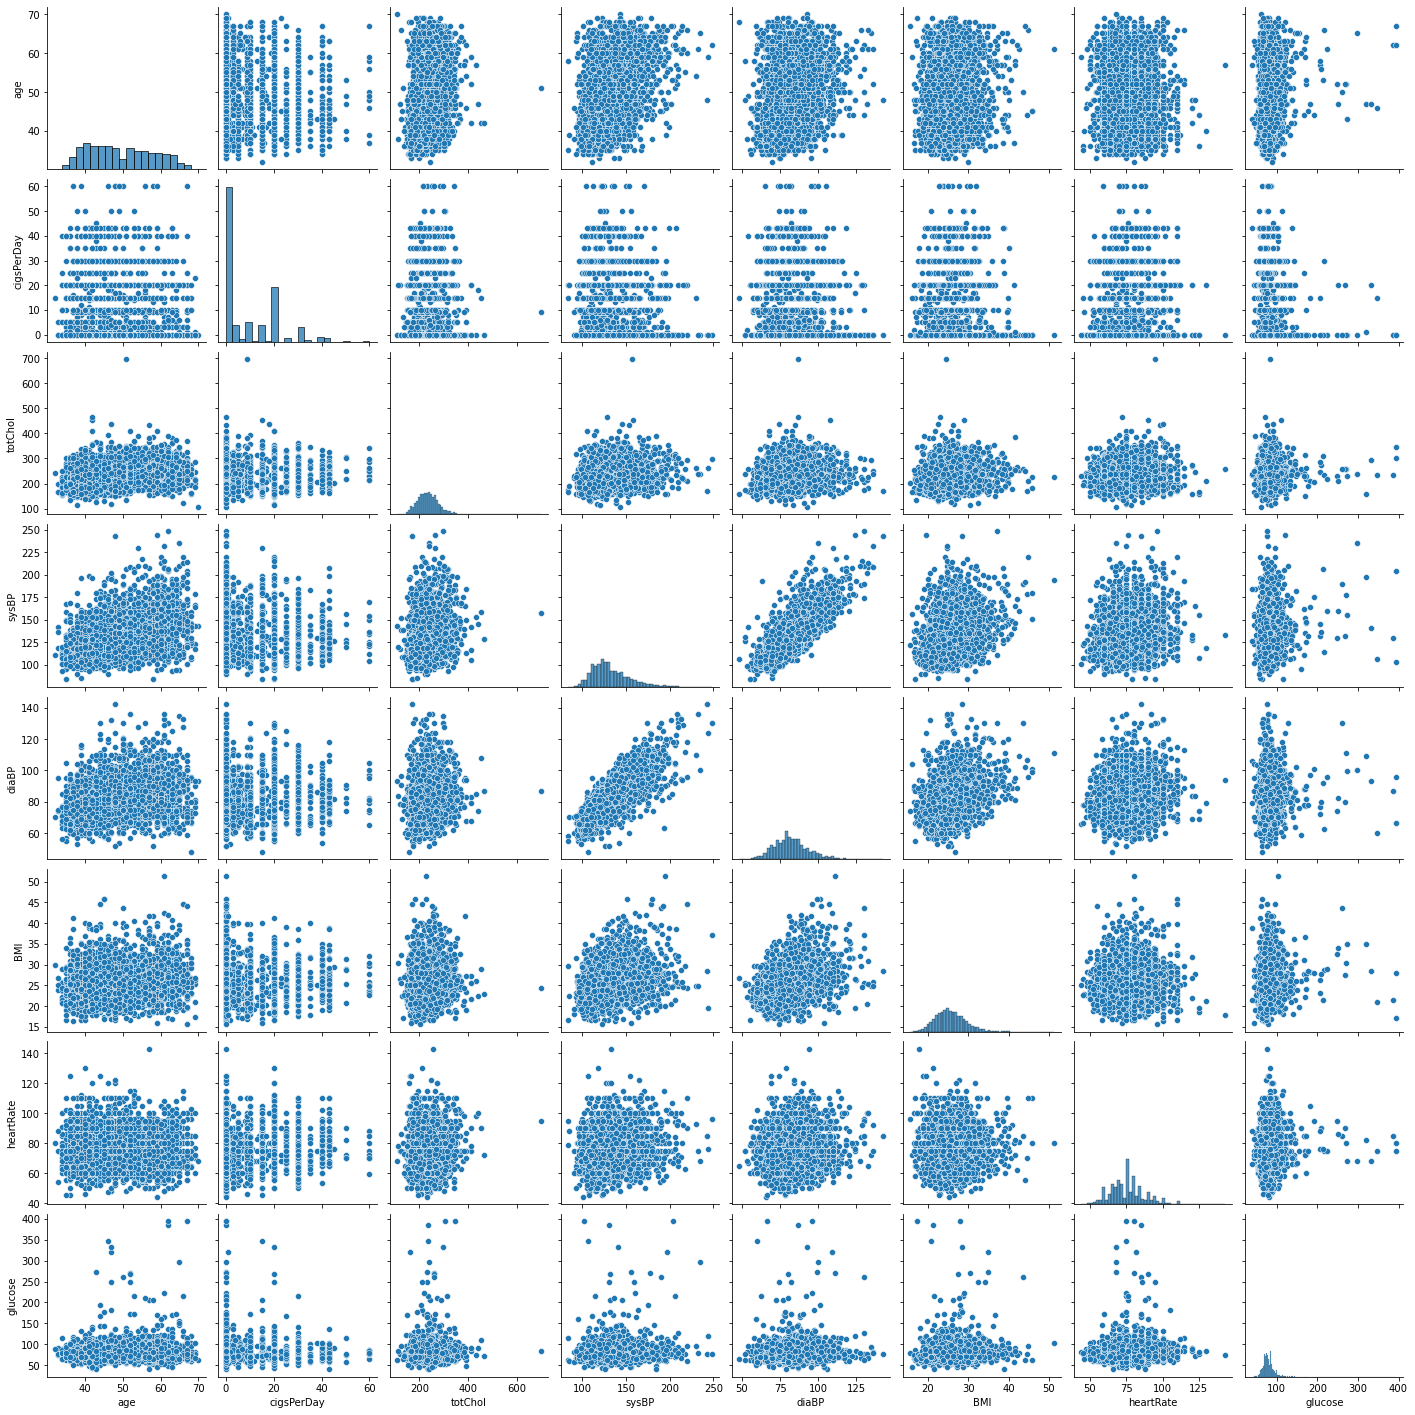

In [10]:
sns.pairplot(df_train[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']])

Большая часть количественных признаков слабо коррелируют друг с другом, за исключением:<li>переменных, отвечающих за кровяное давление (diaBP, sysBP) - сильная корреляция;<li>индекса массы тела и показателей кровяного давления (BMI, diaBP/sysBP) - умеренная корреляция;<li>возвраста и систолического кровяного давления (age и sysBP) - умеренная корреляция<br><br>Что также подтверждается графиком матрицы корреляций ниже<br><br>Скорее всего, один из показателей кровяного давления следует исключить перед построением модели

В целом распределение количественных признаков выглядит разумным. Большая часть значений в пределах медицинских норм, тогда как наблюдаются и естественные отклонения. Отмечается, что хоть распределение респондентов по возрасту выглядит равномерным, в нем не представлены более молодые возрастные группы, которые тоже вполне могут сталкиваться с сердено-сосудистыми заболеваниями. Обращает на себя внимание и то, что большая часть респондентов не является курильщиками.

<AxesSubplot:>

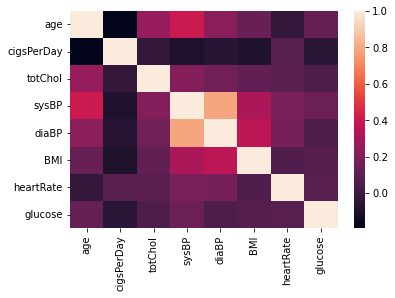

In [11]:
sns.heatmap(df_train[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']].corr())

Также на гистрограммах матрицы графиков рассеивания можно заметить возможное наличие выбросов у некоторых признаков:<li>totChol;<li>BMI;<li>heartRate;<li>glucose<br><br>Проверим это, построив коробку с усами и график рассеивания с целевой переменной плюс переменная возраста

<AxesSubplot:xlabel='age', ylabel='totChol'>

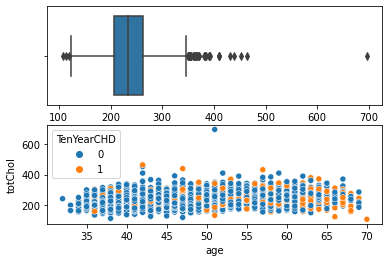

In [12]:
fig, axs = plt.subplots(nrows=2)

sns.boxplot(df_train['totChol'], ax=axs[0])
sns.scatterplot(data=df_train, x='age', y='totChol', hue='TenYearCHD', ax=axs[1])

<AxesSubplot:xlabel='age', ylabel='BMI'>

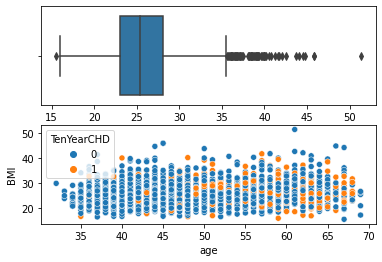

In [13]:
fig, axs = plt.subplots(nrows=2)

sns.boxplot(df_train['BMI'], ax=axs[0])
sns.scatterplot(data=df_train, x='age', y='BMI', hue='TenYearCHD', ax=axs[1])

<AxesSubplot:xlabel='age', ylabel='heartRate'>

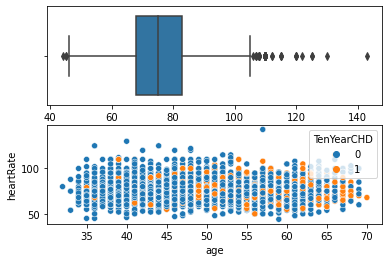

In [14]:
fig, axs = plt.subplots(nrows=2)

sns.boxplot(df_train['heartRate'], ax=axs[0])
sns.scatterplot(data=df_train, x='age', y='heartRate', hue='TenYearCHD', ax=axs[1])

<AxesSubplot:xlabel='age', ylabel='glucose'>

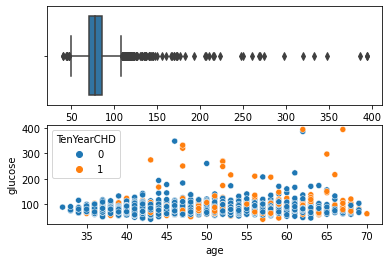

In [15]:
fig, axs = plt.subplots(nrows=2)

sns.boxplot(df_train['glucose'], ax=axs[0])
sns.scatterplot(data=df_train, x='age', y='glucose', hue='TenYearCHD', ax=axs[1])

Судя по построенным графикам рассеивания переменных, потенциально содержащих выбросы, и целевой переменной, высокие значения признаков, сигнализирующие об отклонениях в здоровье, вовсе не обязательно приводили к возникновению сердечно-сосудистого заболевания.

In [16]:
# df_train.sort_values(by=['totChol'], ascending=[False]).head(5)

In [17]:
# df_train.sort_values(by=['BMI'], ascending=[False]).head(5)

In [18]:
# df_train.sort_values(by=['heartRate'], ascending=[False]).head(5)

In [19]:
# df_train.sort_values(by=['glucose'], ascending=[False]).head(5)

<AxesSubplot:xlabel='age', ylabel='sysBP'>

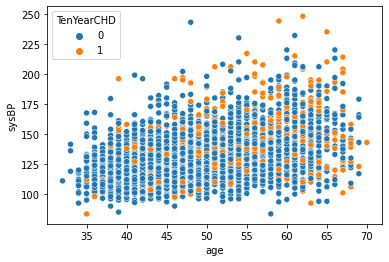

In [20]:
sns.scatterplot(data=df_train, x='age', y='sysBP', hue='TenYearCHD')

<AxesSubplot:xlabel='age', ylabel='diaBP'>

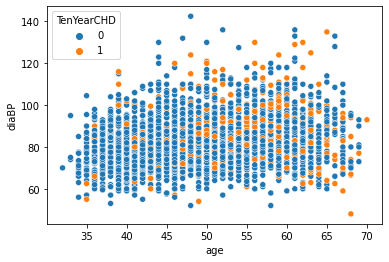

In [21]:
sns.scatterplot(data=df_train, x='age', y='diaBP', hue='TenYearCHD')

<AxesSubplot:xlabel='age', ylabel='cigsPerDay'>

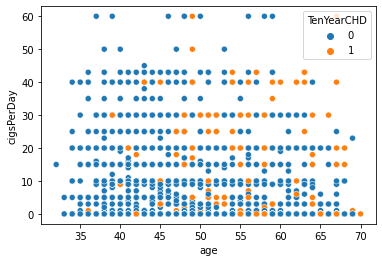

In [22]:
sns.scatterplot(data=df_train, x='age', y='cigsPerDay', hue='TenYearCHD')

Анализ попарных графиков рассеивания количественных признаков и целевой переменной позволяют предположить, что наряду с возрастом наиболее значимо повышается риск сердечно-сосудистых забовлеваний в случаях высокого уровня холестерина, повышенного кровяного давления или злоупотребления курением

## Категориальные признаки

In [23]:
sns.set(rc={'figure.figsize':(24,3)})

<AxesSubplot:xlabel='age', ylabel='education'>

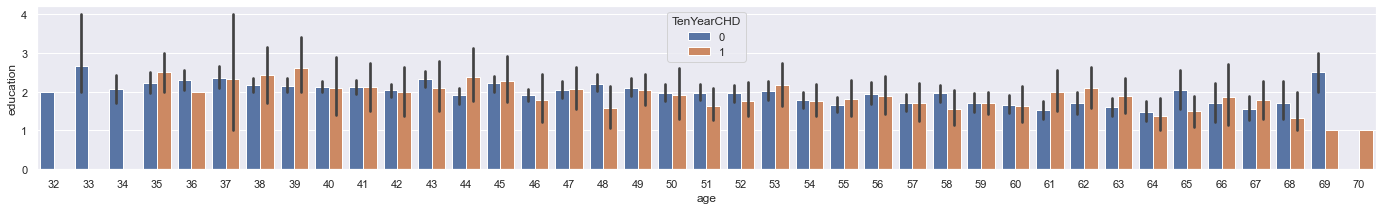

In [24]:
sns.barplot(data=df_train, x='age', y='education', hue='TenYearCHD')

Связь сердечно-сосудистых заболеваний и уровня образования прослеживается слабо

<AxesSubplot:xlabel='age', ylabel='currentSmoker'>

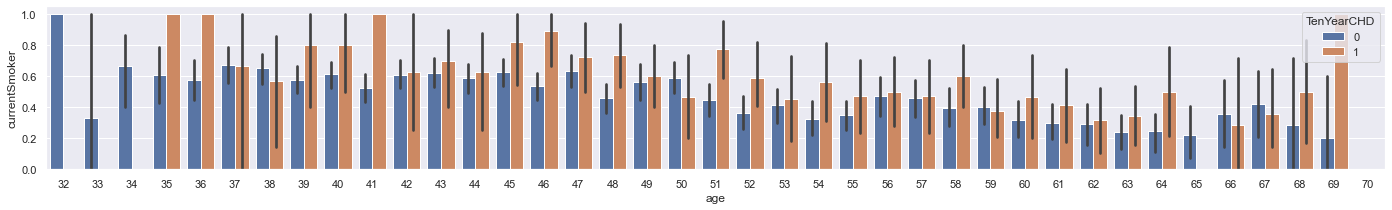

In [25]:
sns.barplot(data=df_train, x='age', y='currentSmoker', hue='TenYearCHD')

Предположение, что курение повышает риск развития сердечно-сосудистого заболевания, ранее выдвинутоые при анализе количества сигарет в день, подтверждается. Однако, возможно, следует один из дублирующих друг друга по смыслу признаков убрать

<AxesSubplot:xlabel='age', ylabel='BPMeds'>

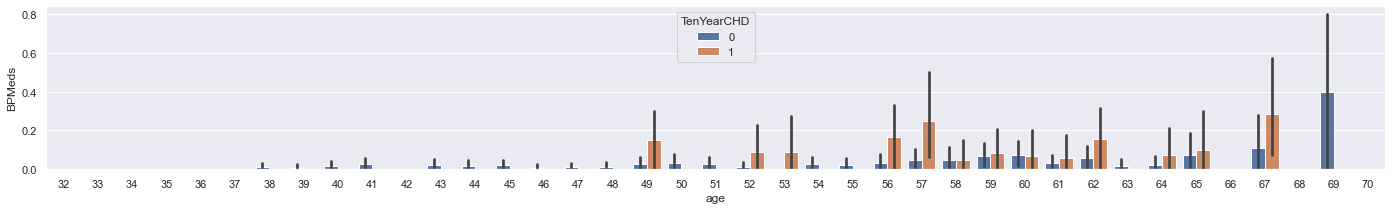

In [26]:
sns.barplot(data=df_train, x='age', y='BPMeds', hue='TenYearCHD')

<AxesSubplot:xlabel='age', ylabel='prevalentStroke'>

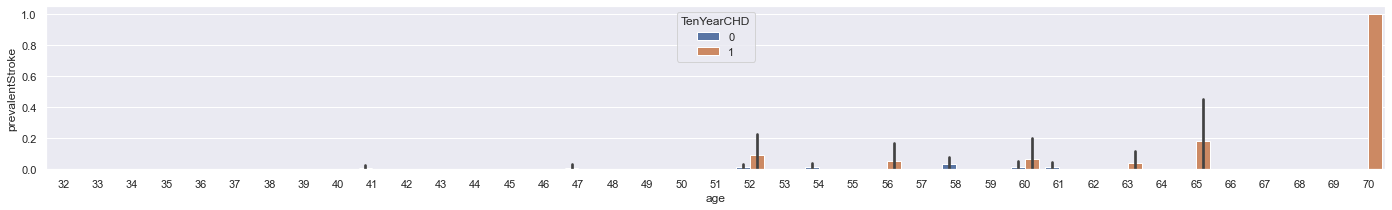

In [27]:
sns.barplot(data=df_train, x='age', y='prevalentStroke', hue='TenYearCHD')

<AxesSubplot:xlabel='age', ylabel='prevalentHyp'>

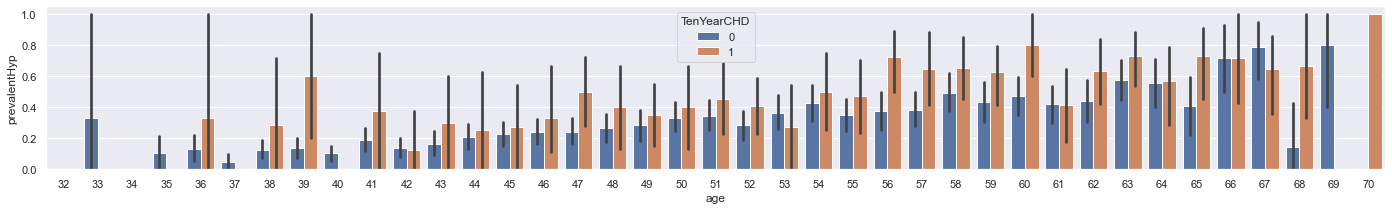

In [28]:
sns.barplot(data=df_train, x='age', y='prevalentHyp', hue='TenYearCHD')

<AxesSubplot:xlabel='age', ylabel='diabetes'>

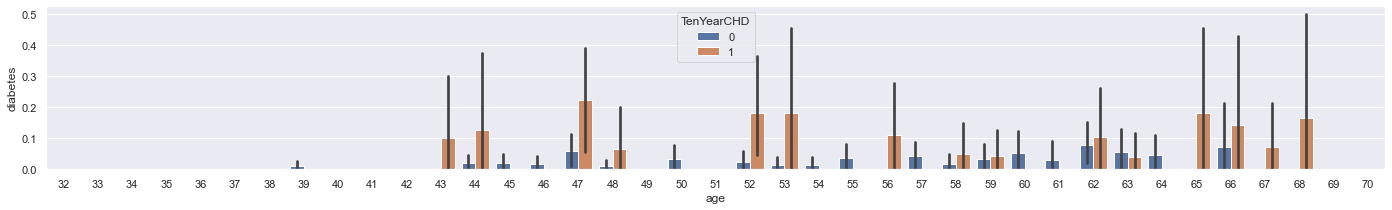

In [29]:
sns.barplot(data=df_train, x='age', y='diabetes', hue='TenYearCHD')

Связь между приемом лекарств от давления, ранее перенесенного сердечного удара, наличия гипертонии, наличия диабета и риском сердечно-сосудистого заболевания очевидна

# 5. Обработать пропущенные значения

In [30]:
df_train.isna().sum()

male                 0
age                  0
education           78
currentSmoker        0
cigsPerDay          21
BPMeds              32
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             40
sysBP                0
diaBP                0
BMI                 11
heartRate            1
glucose            273
TenYearCHD           0
dtype: int64

In [31]:
df_test.isna().sum()

male                 0
age                  0
education           27
currentSmoker        0
cigsPerDay           8
BPMeds              21
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             10
sysBP                0
diaBP                0
BMI                  8
heartRate            0
glucose            115
TenYearCHD           0
dtype: int64

Обнаружены пропущенные значения. Для категориальных признаков пропуски заполним медианным значением, тогда как для количественных признаков - средним значением

In [32]:
for var_name in ['education', 'BPMeds']:
    df_train[var_name].fillna(df_train[var_name].median(), inplace=True)
    df_test[var_name].fillna(df_train[var_name].median(), inplace=True)

In [33]:
for var_name in ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']:
    df_train[var_name].fillna(df_train[var_name].mean(), inplace=True)
    df_test[var_name].fillna(df_train[var_name].mean(), inplace=True)

In [34]:
df_train.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [35]:
df_test.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# 6. Исключить нерелевантные признаки

Таковых не найдено

# 7. Если необходимо, то обработать коррелированные признаки

Из двух коррелирующих признаков diaBP и sysBP оставляем diaBP

In [36]:
df_train.drop('sysBP', axis=1, inplace=True)
df_test.drop('sysBP', axis=1, inplace=True)

Из двух близких по смыслу признаков cigsPerDay и currentSmoker оставляем currentSmoker

In [37]:
df_train.drop('cigsPerDay', axis=1, inplace=True)
df_test.drop('cigsPerDay', axis=1, inplace=True)

# 8. Обработать категориальные признаки

Дополнительная обработка не требуется. Значения признаков уже приведены в числовой формат

# 9. Провести масштабирование

In [38]:
scaler = StandardScaler()

In [39]:
y_train = df_train['TenYearCHD']
y_test = df_test['TenYearCHD']

x_train = df_train.drop('TenYearCHD', axis=1)
x_test = df_test.drop('TenYearCHD', axis=1)

In [40]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

# 10. Вам может понадобиться другая предобработка

Не требуется

# 11. После шагов 5–10 разумно вернутся к шагу 4

ОК

# 12. Попробуйте как минимум 3 метода классификации

Я выбрал попробовать следующие методы: логистическая регрессия - как относительно простой подход для решения задачи классификации, метод k ближайших соседей - как часто применяемый подход ранее для решения задач классификации, дерево решений - как потенциально наиболее гибкий и эффективный подход для решения задач классификации

In [41]:
message = '{name}:\nAccuracy = {accuracy}\nRecall = {recall}\nPrecision = {precision}\nF1_score = {f1_score}'

## Дерево решений

In [42]:
cls_tree = DecisionTreeClassifier(max_depth=3, random_state=49)
cls_tree.fit(x_train_scaled, y_train)

cls_tree_pred_train = cls_tree.predict(x_train_scaled)
cls_tree_pred_test = cls_tree.predict(x_test_scaled)

print(message.format(
    name='Train',
    accuracy=np.round(accuracy_score(y_train, cls_tree_pred_train), 4),
    recall=np.round(recall_score(y_train, cls_tree_pred_train), 4),
    precision=np.round(precision_score(y_train, cls_tree_pred_train), 4),
    f1_score=np.round(f1_score(y_train, cls_tree_pred_train), 4)
))

print(message.format(
    name='Test',
    accuracy=np.round(accuracy_score(y_test, cls_tree_pred_test), 4),
    recall=np.round(recall_score(y_test, cls_tree_pred_test), 4),
    precision=np.round(precision_score(y_test, cls_tree_pred_test), 4),
    f1_score=np.round(f1_score(y_test, cls_tree_pred_test), 4)
))

Train:
Accuracy = 0.8506
Recall = 0.02
Precision = 0.8182
F1_score = 0.039
Test:
Accuracy = 0.8475
Recall = 0.0206
Precision = 0.5
F1_score = 0.0396


## KNN

In [43]:
cls_knn = KNeighborsClassifier(n_neighbors=3)
cls_knn.fit(x_train_scaled, y_train)

cls_knn_pred_train = cls_knn.predict(x_train_scaled)
cls_knn_pred_test = cls_knn.predict(x_test_scaled)

print(message.format(
    name='Train',
    accuracy=np.round(accuracy_score(y_train, cls_knn_pred_train), 4),
    recall=np.round(recall_score(y_train, cls_knn_pred_train), 4),
    precision=np.round(precision_score(y_train, cls_knn_pred_train), 4),
    f1_score=np.round(f1_score(y_train, cls_knn_pred_train), 4)
))

print(message.format(
    name='Test',
    accuracy=np.round(accuracy_score(y_test, cls_knn_pred_test), 4),
    recall=np.round(recall_score(y_test, cls_knn_pred_test), 4),
    precision=np.round(precision_score(y_test, cls_knn_pred_test), 4),
    f1_score=np.round(f1_score(y_test, cls_knn_pred_test), 4)
))

Train:
Accuracy = 0.8881
Recall = 0.3889
Precision = 0.7543
F1_score = 0.5132
Test:
Accuracy = 0.8129
Recall = 0.134
Precision = 0.2708
F1_score = 0.1793


## Логистическая регрессия

In [44]:
cls_log = LogisticRegression(random_state=49)
cls_log.fit(x_train_scaled, y_train)

cls_log_pred_train = cls_log.predict(x_train_scaled)
cls_log_pred_test = cls_log.predict(x_test_scaled)

print(message.format(
    name='Train',
    accuracy=np.round(accuracy_score(y_train, cls_log_pred_train), 4),
    recall=np.round(recall_score(y_train, cls_log_pred_train), 4),
    precision=np.round(precision_score(y_train, cls_log_pred_train), 4),
    f1_score=np.round(f1_score(y_train, cls_log_pred_train), 4)
))

print(message.format(
    name='Test',
    accuracy=np.round(accuracy_score(y_test, cls_log_pred_test), 4),
    recall=np.round(recall_score(y_test, cls_log_pred_test), 4),
    precision=np.round(precision_score(y_test, cls_log_pred_test), 4),
    f1_score=np.round(f1_score(y_test, cls_log_pred_test), 4)
))

Train:
Accuracy = 0.8533
Recall = 0.0578
Precision = 0.7027
F1_score = 0.1068
Test:
Accuracy = 0.853
Recall = 0.0567
Precision = 0.7333
F1_score = 0.1053


## Вывод

При сравнении результатов был выбран подход Деревья решений, показаваший наиболее стабильные значений метрик качества прогноза. Тогда как для KNN наблюдалось переобучение, а для логистической регрессии характерно меньшее значение F1 меры<br><br>Хотя, учитывая специфику задачи, где, возможно, важнее recall, то есть отловить как можно больше случаев с риском заболевания, стоит попробовать поиграться с KNN

# 13. На одном из методов найдите оптимальное значение параметров

In [45]:
knn_params = {
    "n_neighbors": range(3, 26), 
    "weights": ['uniform', 'distance'], 
    "metric": ['manhattan', 'cosine', 'euclidean']}

knn_grid = GridSearchCV(cls_knn, knn_params, cv=5, n_jobs=-1, verbose=True, scoring='recall')

knn_grid.fit(x_train_scaled, y_train)

knn_grid.best_params_

Fitting 5 folds for each of 138 candidates, totalling 690 fits


{'metric': 'cosine', 'n_neighbors': 3, 'weights': 'distance'}

In [46]:
cols = [
    'param_metric', 
    'param_n_neighbors', 
    'param_weights',
    'mean_test_score', 
    'std_test_score', 
    'rank_test_score'
]

In [47]:
df_cv_results = pd.DataFrame(knn_grid.cv_results_)[cols]
df_cv_results['param_metric_weights'] = df_cv_results.apply(lambda x: str(x.param_metric) + '+' + str(x.param_weights), axis=1)
df_cv_results.sort_values(by=['rank_test_score'], ascending=[True]).head()

,param_metric,param_n_neighbors,param_weights,mean_test_score,std_test_score,rank_test_score,param_metric_weights
47,cosine,3,distance,0.168889,0.045758,1,cosine+distance
46,cosine,3,uniform,0.162222,0.053794,2,cosine+uniform
49,cosine,4,distance,0.160000,0.039503,3,cosine+distance
92,euclidean,3,uniform,0.157778,0.048889,4,euclidean+uniform
93,euclidean,3,distance,0.157778,0.048889,4,euclidean+distance


In [48]:
list()

[]

<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

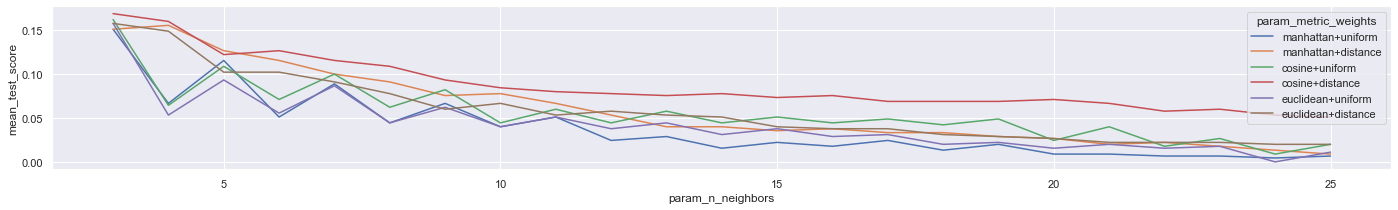

In [49]:
sns.lineplot(data=df_cv_results, x='param_n_neighbors', y='mean_test_score', hue='param_metric_weights')

Согласно результатам кросс-валидации, наилучшие параметры {'metric': 'cosine', 'n_neighbors': 3, 'weights': 'distance'}

In [50]:
cls_knn = KNeighborsClassifier(n_neighbors=3, metric='cosine', weights='distance')
cls_knn.fit(x_train_scaled, y_train)

cls_knn_pred_train = cls_knn.predict(x_train_scaled)
cls_knn_pred_test = cls_knn.predict(x_test_scaled)

print(message.format(
    name='Train',
    accuracy=np.round(accuracy_score(y_train, cls_knn_pred_train), 4),
    recall=np.round(recall_score(y_train, cls_knn_pred_train), 4),
    precision=np.round(precision_score(y_train, cls_knn_pred_train), 4),
    f1_score=np.round(f1_score(y_train, cls_knn_pred_train), 4)
))

print(message.format(
    name='Test',
    accuracy=np.round(accuracy_score(y_test, cls_knn_pred_test), 4),
    recall=np.round(recall_score(y_test, cls_knn_pred_test), 4),
    precision=np.round(precision_score(y_test, cls_knn_pred_test), 4),
    f1_score=np.round(f1_score(y_test, cls_knn_pred_test), 4)
))

Train:
Accuracy = 1.0
Recall = 1.0
Precision = 1.0
F1_score = 1.0
Test:
Accuracy = 0.8121
Recall = 0.1753
Precision = 0.3009
F1_score = 0.2215


# 14. Применить методы балансировки

In [51]:
pass

# 15. Сделать общие выводы

С помощью кросс-валидации удалось подобрать оптимальные гиперпараметры, позволяющие максимизировать метрику recall. Однако для метода KNN в любом случае характерно заметное переобучение. Возможно, стоило бы попробовать добиться лучших результатов за счет подобора более оптимальных гиперпараметров для Дерева решений